<a href="https://colab.research.google.com/github/ananya1262/Traffic_sign_detector/blob/main/Copy_of_Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic sign detector (ML Project)

 **The aim of our project is to create a traffic sign classification model using Convolutional Neural Network. We will be utilizing tensorflow and keras to train and test this model, which involves multiple classifications. Ultimately, the goal is to produce a model that can assist in the development of intelligent automobiles.bold text**

In [1]:
#Run this cell adn select the kaggle.json file downloaded from kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ananyagarg1262","key":"5d59401dbbd0fa0f0a332f8cc0347478"}'}

In [2]:
#Install the kaggle API client
!pip install -q kaggle

In [3]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [5]:
# Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          75328        920  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           9735        241  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            343          8  0.75             
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [6]:
# Downloading dataset and coming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
%cd ..

 99% 605M/612M [00:06<00:00, 121MB/s]
100% 612M/612M [00:06<00:00, 104MB/s]
/content


In [7]:
# Unzipping downloaded file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [8]:
#Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D 

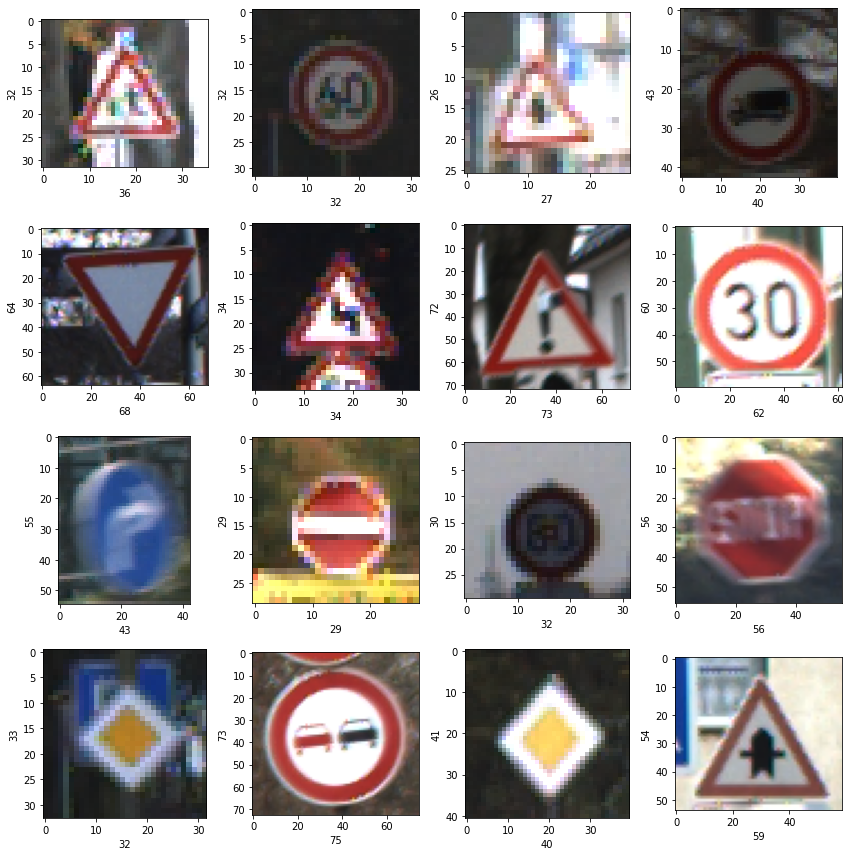

In [9]:
#Plotting 16 images to check dataset
plt.figure(figsize=(12,12))
path="traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10)
  plt.ylabel(rand_img.shape[0],fontsize=10)

In [10]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])


In [11]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [12]:
# Now we will reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [13]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images=images/255

In [16]:
#Store the label ids into numpy array and print the shape. Here it can be seen that there are 39209 label ids
label_id=np.array(label_id)
label_id.shape

(39209,)

In [17]:
images.shape

(39209, 50, 50, 3)

In [18]:
# Here we will check and observe whether the data is balanced or not. From the result it can be seen that the data is balanced
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [19]:
#Here we will split the data into training and test set. With 80% training data and 20% test data
#Splitting the data
x_train,x_val,y_train,y_val=train_test_split(images,label_id,test_size=0.2,random_state=42)

In [20]:
#keras has a built-in function for one-hot encoding.
#To transform the classes column into a categorical format, we can use the to_categorical() function. This function will convert the class data into a set of binary vectors, which will represent each category in a unique way.
y_train_cat=to_categorical(y_train)
y_val_cat=to_categorical(y_val)

In [21]:
#In the step of defining the model architecture, we will specify the structure of the model by defining its various layers. 
#Each layer will have certain properties such as its input shape, kernel size, and activation function.

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

Once the model architecture has been defined, the next step is to compile the model. During this process, we will specify the optimizer, loss function, and any required metrics for the model. The optimizer will be used to minimize the loss function and improve the accuracy of the model during training. The metrics will be used to evaluate the performance of the model during and after training. After compiling the model, we can print out a summary that will provide information about each layer in the model,

In [22]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [23]:
#Now we will fit the model and observe how our is getting trained on each epoch.
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_val,y_val),verbose=2)

Epoch 1/10
246/246 - 238s - loss: 2.4914 - accuracy: 0.3199 - val_loss: 1.2575 - val_accuracy: 0.6942 - 238s/epoch - 968ms/step
Epoch 2/10
246/246 - 244s - loss: 1.1679 - accuracy: 0.6364 - val_loss: 0.4960 - val_accuracy: 0.9072 - 244s/epoch - 993ms/step
Epoch 3/10
246/246 - 245s - loss: 0.7545 - accuracy: 0.7589 - val_loss: 0.2739 - val_accuracy: 0.9454 - 245s/epoch - 995ms/step
Epoch 4/10
246/246 - 244s - loss: 0.5840 - accuracy: 0.8100 - val_loss: 0.1846 - val_accuracy: 0.9620 - 244s/epoch - 992ms/step
Epoch 5/10
246/246 - 250s - loss: 0.4861 - accuracy: 0.8428 - val_loss: 0.1508 - val_accuracy: 0.9742 - 250s/epoch - 1s/step
Epoch 6/10
246/246 - 245s - loss: 0.4319 - accuracy: 0.8612 - val_loss: 0.1160 - val_accuracy: 0.9783 - 245s/epoch - 997ms/step
Epoch 7/10
246/246 - 238s - loss: 0.3765 - accuracy: 0.8771 - val_loss: 0.1002 - val_accuracy: 0.9832 - 238s/epoch - 967ms/step
Epoch 8/10
246/246 - 245s - loss: 0.3360 - accuracy: 0.8913 - val_loss: 0.0871 - val_accuracy: 0.9867 - 245

The next step involves visualizing the model's accuracy and loss per epoch. To achieve this, we will save the model history into a pandas dataframe, which will allow us to easily plot and analyze the data. The data will include the accuracy and loss metrics for each epoch of the model's training process. 

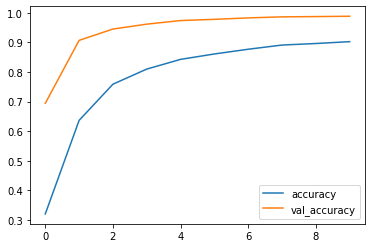

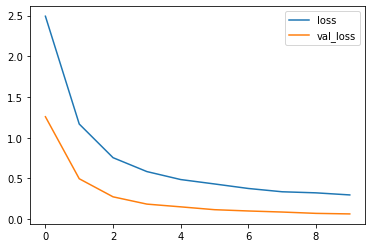

In [24]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

 We will create a variable that contains the file path to the test dataset. While downloading the dataset, we noticed that there is a file named GT-final_test.csv in the test images folder which cannot be processed along with the other images. Therefore, we will remove this file from the test dataset to avoid any errors during the testing process.

In [25]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [27]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [28]:
#Calling the above created function on test images
test_images = scaling(sorted(os.listdir(test_path)),test_path)

Now we will read label ids from Test.csv and store the values of the class id in y_test variable.

In [29]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

We will use the model to make predictions on our test images and save them in y_pred.

In [30]:
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_pred

395/395 [==============================] - 19s 48ms/step


array([16,  1, 38, ..., 38,  7, 10])

In [31]:
# Storing all lables
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

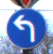

In [32]:
#Visualize test Image
img=Image.open(test_path+'/00032.png')
img

In [33]:
#original label
print("Original label:",all_labels[y_test[32]])

Original label: Turn left ahead


In [34]:
#Predicted label
print("Predicted Label:",all_labels[y_pred[32]])

Predicted Label: Turn left ahead


# Conclusion
The project began by downloading the dataset and performing preprocessing tasks. Afterward, a model was created and used to generate predictions based on the preprocessed data. During the preprocessing step, it was discovered that the dataset contained 43 classes. The model was able to achieve an accuracy of over 95% after only 50 epochs, which is a promising result. However, further optimization can be done using hyperparameter tuning to potentially achieve an even higher level of accuracy. This model can be used in smart cars like self driving cars which will enable them to automatically recognize traffic signs similarly the driver alert system inside cars will help and protect drivers by understanding the traffic signs around them.